## Meta Data

### DATA Description

- video_id	영상의 비디오 아이디
- channel_id	영상이 업로드 되어있는 채널 아이디
- published_date	영 상이 유튜브에 업로드된 날짜
- category_name	영상/채널의 카테고리
- duration	영상 길이 (PT1H13M25S == 1시간13분25초)
- tags	영상에 사용된 해시태그
- description	영상부연설명
- on_trending_date	인기 동영상에서 처음 포착된 날짜
- off_trending_date	인기 동영상에서 사라진 날짜
- on_rank	인기 동영상에서 처음 기록된 순위
- off_rank	인기 동영상에서 사라지기전 기록된 순위
- on_views	인기 동영상에서 처음 기록된 조회수
- off_views	인기 동영상에서 사라지기전 기록된 조회수
- on_likes	인기 동영상에서 처음 기록된 좋아요수
- off_likes	인기 동영상에서 사라지기전 기록된 좋아요수
- on_dislikes	인기 동영상에서 처음 기록된 싫어요수
- off_dislikes	인기 동영상에서 사라지기전 기록된 싫어요수
- on_comments	인기 동영상에서 처음 기록된 댓글수
- off_comments	인기 동영상에서 사라지기전 기록된 댓글수
- on_channel_subscribers	인기 동영상에서 처음 기록된 채널의 구독자수
- off_channel_subscribers	인기 동영상에서 사라지기전 기록된 채널의 구독자수
- on_channel_total_views	인기 동영상에서 처음 기록된 채널의 전체 비디오 조회수의 합
- off_channel_total_views	인기 동영상에서 사라지기전 기록된 채널의 전체 비디오
조회수의 합
- on_channel_total_videos	인기 동영상에서 처음 기록된 채널의 비디오 개수
- off_channel_total_videos	인기 동영상에서 사라지기전 기록된 채널의 비디오 개수


## EDA & Preprocess

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; 
warnings.filterwarnings(action='ignore')


# warning 삭제용
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
df = pd.read_csv('data/pretest_data.csv')
df.head()

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


### 중복 record 처리

In [3]:
### 주요변수 선택

df[['video_id','channel_id','category_name']].describe()

,video_id,channel_id,category_name
count,2644,2644,2644
unique,2643,940,15
top,VBSBm,CHQ2O-i,Entertainment
freq,2,17,954


- video_id의 unique value가 전체 count 보다 1개 모자라므로 video_id가 중복된 것으로 보임 

In [4]:
df[df.duplicated(['video_id'])]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,625,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456


In [5]:
df[df['video_id']=='VBSBm']

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
534,VBSBm,CH0VR2v,2021-05-07,Entertainment,PT11M6S,요리|레시피|육식|고기|육식맨|고기요리|YOOXICMAN|짜장면|자장면|짜장|고기짜...,"※ 오늘 영상에 등장하는 모든 식재료, 조리도구, 업장, TV프로그램, 브랜드, 서...",2021-05-09,2021-05-10,40,...,156,187,1458,1568,652000,652000,94094934,94383615,90,90
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,625,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456


video_id가 중복된 두 레코드가 내용상 서로 다르기에 이후 분석은 아래쪽 레코드의 video_id값을 변경하여 진행함


In [6]:
cond = (df['video_id']=='VBSBm') & (df['category_name']=='News & Politics')
df.loc[cond,'video_id'] = 'VBSBm_News_Politics'

In [7]:
df[['video_id','channel_id','category_name']].describe()

,video_id,channel_id,category_name
count,2644,2644,2644
unique,2644,940,15
top,V-0db,CHQ2O-i,Entertainment
freq,1,17,954


In [8]:
df[cond]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,year_month
535,VBSBm_News_Politics,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456,2021-07


## Q1 Visualization

### Ideation

- 카테고리단위 로 나눠서 채널별 차트 생성
- 색상은 기본차트 제외 다른 걸로

### Q1-1 전체 카테고리 채널-> 비디오 개수

- Q1. 데이터 타입별 시각화 (자유양식) 
  - 전체기간 카테고리->채널->비디오 개수
  - 월별 카테고리->채널->비디오 개수
  - 월별 TOP10 채널 (분류 기준은 비디오 개수)
  - 주별 TOP5 채널 (분류 기준은 비디오 개수)
  - 월별 카테고리별 태그 키워드 순위
- Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표들이
있음
ex) views, likes, dislikes, comments,...
  - 비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고
  - 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

In [15]:
#@ Q1 visualization 해결을 위한 class 생성
import plotly.express as px
import math

class YoutubeViz():
    def __init__(self,df):
        self.df = df
        self.df['published_date'] = pd.to_datetime(self.df['published_date'])
        self.df['year_month'] = self.df['published_date'].dt.strftime('%Y-%m')
        self.df['week_num'] = self.df['published_date'].dt.week
        # q1 해결을 위한 요약통계량
        self.q1 = self.df[['video_id','category_name','channel_id','year_month','week_num']].groupby(['category_name','channel_id']). \
            count().\
            sort_values(by='video_id',ascending=False).\
            reset_index(drop=False)
        # tag list column 생성
        self.df['tags_split'] = self.df['tags'].str.split('|')
        # 월별 주차 계산
        self.df['week_num_month'] = self.df['published_date'].apply(self._week_of_month)
        # n월 n주차 변수
        self.df['month_week'] = self.df['year_month'].astype(str) + '-'+ self.df['week_num_month'].astype(str)
        self.df['month_week'] = self.df['month_week'].apply(lambda x: x.split('-')[1]+"월 "+x.split('-')[2]+"주")
        
        
    def _week_of_month(self,dt):
        first_day = dt.replace(day=1)
        dom = dt.day
        adjusted_dom = dom + first_day.weekday()
    
        return int(math.ceil(adjusted_dom/7.0))
    
    # list of list 형태의 Series를 태그의 개수를 세기 위한 함수
    def _count_tag(self,tags:pd.Series):
        """
        series.explode().value_counts() 와 같은 역할
        """
        tags.dropna(inplace=True)
        res=pd.Series(sum([item for item in tags], [])).value_counts().sort_values(ascending=False)
        
        return res
    
    # 카테고리별 채널별 비디오 개수
    def solve_q1_1(self):
        fig = px.bar(self.q1, y='video_id',x='channel_id' ,color='category_name',
                     orientation='v',barmode='stack',
                     color_discrete_sequence=px.colors.qualitative.Dark24,
                     text='video_id')
        fig.update_layout(title_text='Video Count by Category and Channel',
                        xaxis_title='Channel',
                        yaxis_title='Video Count',
                        width=1600,
                        height=800)
        fig.write_html('q1_1.html')
            
        return fig
    
    # 월별 카테고리별 채널별 비디오 개수
    def solve_q1_2(self):
        self.q1_2 = self.df[['video_id','category_name','channel_id','year_month']].groupby(['year_month','category_name','channel_id']). \
            count().\
            sort_values(by='video_id', ascending=False).\
            reset_index(drop=False)
        fig = px.bar(self.q1_2, y='video_id',x='channel_id' ,color='category_name',facet_row="year_month",
                     orientation='v',barmode='stack',facet_col_wrap=2,
                     color_discrete_sequence=px.colors.qualitative.Light24,
                     text='video_id')

        fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
        fig.for_each_yaxis(lambda y: y.update(title='Video Count'))
        fig.update_layout(title_text='Video Count by Category and Channel by Month',
                        xaxis_title='Channel',
                        #yaxis_title='Video Count',
                        width=1600,
                        height=800)
        fig.write_html('q1_2.html')
        
        return fig

    # 월별 비디오 개수 기준 Top10 채널
    def solve_q1_3(self):
        self.q1_3 = self.df[['video_id','category_name','channel_id','year_month']].groupby(['year_month','channel_id','category_name']). \
            count().\
            sort_values(by='video_id', ascending=False).\
            reset_index(drop=False)
        top10 = self.q1_3.sort_values(['year_month','video_id'],ascending=[True,False]).groupby('year_month'). \
            head(10)
        fig = px.bar(top10, y='video_id',x='channel_id' ,facet_col="year_month",color='category_name',color_discrete_sequence=px.colors.qualitative.Dark24,text='video_id')
        fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
        fig.update_xaxes(showticklabels=True , matches=None)
        fig.update_layout(title_text='Top 10 Channel by Month',
                          yaxis_title='Video Count',
                          xaxis_title=None)
        fig.write_html('q1_3.html')
    
        return fig
        
    # 주별 비디오 개수 기준 Top5 채널
    def solve_q1_4(self):
        self.q1_4 = self.df[['video_id','category_name','channel_id','week_num','month_week']].groupby(['month_week','week_num','channel_id','category_name']). \
            count().\
            sort_values(by='video_id',ascending=False).\
            reset_index(drop=False) 
        top5=self.q1_4.sort_values(['month_week','video_id'],ascending=[True,False]).groupby('month_week'). \
            head(5)
        fig = px.bar(top5, y='video_id',x='channel_id' ,facet_col="month_week",text='video_id',color='category_name',color_discrete_sequence=px.colors.qualitative.Dark24)
        fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
        fig.for_each_xaxis(lambda x: x.update(title='Channel'))
        fig.update_xaxes(showticklabels=True , matches=None)
        #fig.update_xaxes(showticklabels=True , matches=None)
        # hide the x-axis title
        fig.update_layout(title_text='Top 5 Channel by Week',
                          yaxis_title='Video Count',
                          xaxis_title=None)
        fig.write_html('q1_4.html')
        
    
        
        return fig
    

    # 월별 카테고리별 태그 키워드 순위 시각화
    def solve_q1_5(self):
        q1_5 = self.df.groupby(['year_month','category_name'])['tags_split'].apply(self._count_tag).reset_index()
        q1_5.sort_values(['year_month','category_name','tags_split'],ascending=[True,True,False],inplace=True)
        q1_5_viz=q1_5.groupby(['year_month','category_name']).head(5)
        
        fig_tag = px.bar(q1_5_viz, y='tags_split',x='level_2' ,facet_col="year_month", facet_row="category_name",
                 labels={'year_month':'Year-Month','category_name':'Category','tags_split':'Tag Count','level_2':'Tag'},text='tags_split')
        fig_tag.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
        fig_tag.for_each_annotation(lambda a: a.update(borderpad=29,borderwidth=15, font= dict(size=15,color='black')))
        # annotation category position
        fig_tag.update_xaxes(showticklabels=True , matches=None)
        fig_tag.update_layout(title_text='',
                      # yaxis margin
                      yaxis = dict(automargin=True),
                      # annotaion margin
                      margin=dict(l=80,r=80,b=80,t=80),
                      width=1600,
                      height=2400)
        #fig_tag.update_layout(title_pad=dict(t=5,l=10,b=50,r=10))
        fig_tag.write_image('q1_5.png')
        
        
        return fig_tag
            


In [16]:
youtube_viz = YoutubeViz(df)

### Q1-1 카테고리별 채널별 비디오 개수



In [42]:
youtube_viz.solve_q1_1()

### Q1-2 월별 카테고리별 채널별 비디오 개수

In [43]:
youtube_viz.solve_q1_2()

### Q1-3 월별 비디오 개수 기준 Top10 채널

In [44]:
youtube_viz.solve_q1_3()

### Q1-4 주별 비디오 개수 기준 Top5 채널

In [45]:
youtube_viz.solve_q1_4()

### Q1-5 월별 카테고리별 태그 키워드 순위 시각화


In [17]:
youtube_viz.solve_q1_5()

## Q2 Engagement

### Task

Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표들이있음

ex) views, likes, dislikes, comments,...
- 비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고
- 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.



**data description**

- video_id	영상의 비디오 아이디
- channel_id	영상이 업로드 되어있는 채널 아이디
- published_date	영 상이 유튜브에 업로드된 날짜
- category_name	영상/채널의 카테고리
- duration	영상 길이 (PT1H13M25S == 1시간13분25초)
- tags	영상에 사용된 해시태그
- description	영상부연설명
- on_trending_date	인기 동영상에서 처음 포착된 날짜
  - publish_date와 의 기간이 짧을 수록 좋음
- off_trending_date	인기 동영상에서 사라진 날짜
  - -> on off의 사이가 길수록 좋음
- on_rank	인기 동영상에서 처음 기록된 순위
- off_rank	인기 동영상에서 사라지기전 기록된 순위
  - 순위가 올라갈 수록 좋음
- on_views	인기 동영상에서 처음 기록된 조회수
- off_views	인기 동영상에서 사라지기전 기록된 조회수
  - 조회수 차이가 클수록 좋음
- on_likes	인기 동영상에서 처음 기록된 좋아요수
- off_likes	인기 동영상에서 사라지기전 기록된 좋아요수
  - 차이가 클 수록 좋음
- on_dislikes	인기 동영상에서 처음 기록된 싫어요수
- off_dislikes	인기 동영상에서 사라지기전 기록된 싫어요수
- on_comments	인기 동영상에서 처음 기록된 댓글수
- off_comments	인기 동영상에서 사라지기전 기록된 댓글수
- on_channel_subscribers	인기 동영상에서 처음 기록된 채널의 구독자수
- off_channel_subscribers	인기 동영상에서 사라지기전 기록된 채널의 구독자수
  - 차이가 클 수록 좋음 (늘어날 수록 좋음)
- on_channel_total_views	인기 동영상에서 처음 기록된 채널의 전체 비디오 조회수의 합
- off_channel_total_views	인기 동영상에서 사라지기전 기록된 채널의 전체 비디오
조회수의 합
  - 차이가 클수록 좋음
- on_channel_total_videos	인기 동영상에서 처음 기록된 채널의 비디오 개수
- off_channel_total_videos	인기 동영상에서 사라지기전 기록된 채널의 비디오 개수
  - 차이가 클 수록 영향이 큰것인가?

### 가설

In [22]:

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

# clsss YouTubeEngagement 계산을 위한 클래스
class YoutubeEngagement():
    
    def __init__(self, df):
        self.df = df
        self.df['playtime'] = self.df['duration'].apply(lambda x: x.replace('PT',''))
        self.df['published_date'] = pd.to_datetime(self.df['published_date'])
        self.df['on_trending_date'] = pd.to_datetime(self.df['on_trending_date'])
        self.df['off_trending_date'] = pd.to_datetime(self.df['off_trending_date'])
    
    # %h%m%s format을 시간으로 변환하기 위한 함수    
    def _time_parser(self,s:str):
        s = s.lower()
        fmt=''.join('%'+c.upper()+c for c in 'hms' if c in s)
        return datetime.strptime(s, fmt).time()
    # 시간을 초로 변환하는 함수
    def _time_to_sec(self,t:datetime):
        return t.hour*3600 + t.minute*60 + t.second
    
    def engagement(self):
        self.df['playtime_sec'] = self.df['playtime'].apply(self._time_parser).apply(self._time_to_sec)
        self.df['publish_trend_datediff'] = (self.df['on_trending_date'] - self.df['published_date']).apply(lambda x: x.days) # smaller the better
        self.df['trend_off_datediff'] = (self.df['off_trending_date'] - self.df['on_trending_date']).apply(lambda x: x.days)
        self.df['rank_diff'] = self.df['off_rank'] - self.df['on_rank'] # bigger the better
        # view, like, comment, subscribe 
        self.df['views_diff'] = (self.df['off_views'] - self.df['on_views']) #* 100 /self.df['on_views'] # 
        self.df['likes_diff'] = (self.df['off_likes'] - self.df['on_likes']) #* 100 /self.df['on_likes'] #
        # dislike를 포함시킬 것인가?
        #self.df['dislike_diff'] = (self.df['off_dislikes'] - self.df['on_dislikes']) * 100 /self.df['on_dislikes']        
        self.df['comments_diff'] = (self.df['off_comments'] - self.df['on_comments']) #* 100 /self.df['on_comments'] #
        self.df['subscribers_diff'] = (self.df['off_channel_subscribers'] - self.df['on_channel_subscribers']) #* 100 /self.df['on_channel_subscribers'] #        
        self.df['engagement_score'] = self.df['trend_off_datediff'] + self.df['rank_diff'] + self.df['views_diff'] + self.df['likes_diff'] + self.df['comments_diff'] + self.df['subscribers_diff'] - self.df['publish_trend_datediff']
    
        return self.df
            

# engagement score와 관련변수의 상관관계 시각화를 위한 class

class Vizcorr():
  def __init__(self):
    pass
    
  def corrdot(self, *args, **kwargs):
    """
    상관계수 text annotation 용 함수
    """
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 3)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
    
  def corrfunc(self, x, y, **kwargs):
    """
    p value text annotation 용 함수
    """
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=55)
    
  def corr_plot(self,df:pd.DataFrame):
    sns.set(style="white")
    g = sns.PairGrid(df, aspect=1.5, diag_sharey=False, despine=False)
    g.map_lower(sns.regplot, lowess=True, ci=False,
                line_kws={'color': 'red', 'lw': 1},
                scatter_kws={'color': 'black', 's': 20})
    g.map_diag(sns.histplot, color='black',kde=True) 
    g.map_diag(sns.rugplot, color='black')
    g.map_upper(self.corrdot)
    g.map_upper(self.corrfunc)
    g.fig.subplots_adjust(wspace=0, hspace=0)
    
    # axis labels 삭제
    for ax in g.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')

    # Add titles to the diagonal axes/subplots
    for ax, col in zip(np.diag(g.axes), df.columns):
      ax.set_title(col, y=0.82, fontsize=26)
      #ax.ticklabel_format(axis='x', style='plain')
      
    return g
  
  
  def get_redundant_pairs(self,df):
    """
    상관행렬의 하단 상관계수 패어만 추출
    """
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
  

  def get_top_abs_corr(self,df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = self.get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
  


In [23]:
youtube_engagement = YoutubeEngagement(df)
vis_corr = Vizcorr()
youtube_engagement_df=youtube_engagement.engagement()

In [25]:
youtube_engagement_df['engagement_score'] = youtube_engagement_df['engagement_score'].apply(lambda x: round(x,3))
corr_df = youtube_engagement_df[['playtime_sec','on_likes','on_comments','on_views','engagement_score']]

In [26]:
vis_corr.get_top_abs_corr(corr_df,10)

on_likes      on_views            0.902141
on_comments   engagement_score    0.889063
on_views      engagement_score    0.865353
on_comments   on_views            0.841637
on_likes      on_comments         0.796527
              engagement_score    0.788064
playtime_sec  on_likes            0.069966
              on_views            0.061040
              engagement_score    0.050251
              on_comments         0.042359
dtype: float64

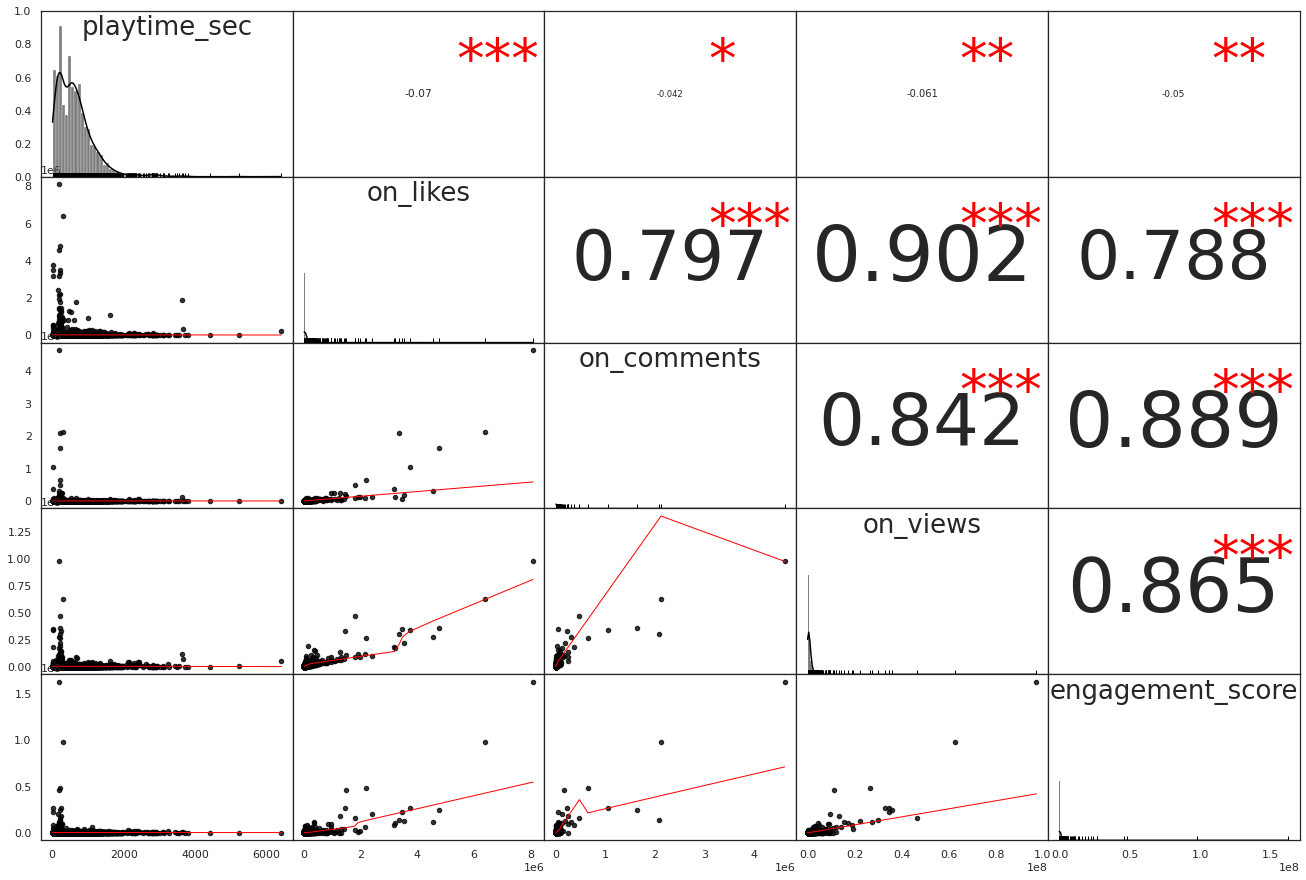

In [27]:
vis_corr.corr_plot(corr_df)

### 결과

## References

- [Youtube Dislike의 영향](https://www.wales247.co.uk/how-do-dislikes-affect-youtube-videos-everything-you-wanted-to-know)
- [Youtube Engagement에 영향을 미치는 요인들](https://www.octoboard.com/reports/youtube-engagement)